Analyses properties of decorrelation and whitening methods for FC and Convolutional cases.

In [1]:
import numpy as np
import torch
from decorrelation.decorrelation import lower_triangular,Decorrelation, DecorConv2d # DecorrelationPatch2d # covariance, DecorrelationPatch2d, DecorrelationFC, lower_triangular
import matplotlib.pyplot as plt
import matplotlib 

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

In [2]:
# RUN ON DEVICE: device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
def decorrelate(num_epochs, data, model, eta):

    # covariance matrix before training
    X = model.decorrelate(data).view(data.shape[0],-1)
    A1 = (X.T @ X) / len(X)

    # train decorrelator
    L = np.zeros(num_epochs)
    for i in range(num_epochs):
        model.forward(data)
        L[i] = model.update()
        # model.weight -= eta * model.weight.grad
        print(f'iteration {i}\tloss: {L[i]:.3f}')

    # covariance matrix after training
    X = model.decorrelate(data).view(data.shape[0],-1)
    A2 = (X.T @ X) / len(X)

    return L, A1, A2

In [4]:
def plot_results(model, L, A1, A2):

    plt.figure(figsize=(14,9))

    plt.subplot(2,2,1)
    plt.plot(L)
    plt.ylabel('loss')
    plt.xlabel('epoch')

    plt.subplot(2,3,3)
    plt.hist([lower_triangular(A1, offset=0), lower_triangular(A2, offset=0)], bins=30, label=['correlated', 'decorrelated'])
    plt.legend()
    plt.xlabel('$x_i x_j$')
    plt.legend();

    plt.subplot(2,3,4)
    min = np.max([np.min(np.abs(model.weight.numpy().flatten())), 1e-10])
    max = np.max(np.abs(model.weight.numpy().flatten()))
    plt.imshow(np.abs(model.weight), cmap=plt.get_cmap('hot'), interpolation='nearest', norm=matplotlib.colors.LogNorm(vmin=min, vmax=max))
    plt.title('|decorrelation weights|')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.subplot(2,3,5)
    min = np.min(np.stack([A1.numpy().flatten(), A2.numpy().flatten()]))
    max = np.max(np.stack([A1.numpy().flatten(), A2.numpy().flatten()]))
    plt.imshow(A1, cmap=plt.get_cmap('hot'), interpolation='nearest') #, norm=matplotlib.colors.LogNorm(vmin=min, vmax=max))
    plt.title('$x_i x_j$')
    plt.colorbar(fraction=0.046, pad=0.04)

    plt.subplot(2,3,6)
    plt.imshow(A2, cmap=plt.get_cmap('hot'), interpolation='nearest') #, norm=matplotlib.colors.LogNorm(vmin=min, vmax=max))
    plt.title('$x_i x_j$ decorrelated')
    plt.colorbar(fraction=0.046, pad=0.04);

We start by showing effective decorrelation of correlated input

In [11]:
num_samples=1000
num_features=100
num_epochs=3000
seed=42
eta=5e-5

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

# generate correlated data
d = torch.distributions.MultivariateNormal(torch.zeros(num_features), 0.8 * torch.eye(num_features) + 0.2 * torch.ones((num_features, num_features)))
data = d.sample((num_samples,))

# create a decorrelator
model = Decorrelation(in_features=num_features, variance = 1.0) # variance = None)

L, A1, A2 = decorrelate(num_epochs, data, model, eta)


iteration 0	loss: 0.044
iteration 1	loss: 0.041
iteration 2	loss: 0.043
iteration 3	loss: 0.041
iteration 4	loss: 0.043
iteration 5	loss: 0.041
iteration 6	loss: 0.043
iteration 7	loss: 0.040
iteration 8	loss: 0.043
iteration 9	loss: 0.040
iteration 10	loss: 0.043
iteration 11	loss: 0.040
iteration 12	loss: 0.043
iteration 13	loss: 0.040
iteration 14	loss: 0.043
iteration 15	loss: 0.040
iteration 16	loss: 0.043
iteration 17	loss: 0.040
iteration 18	loss: 0.043
iteration 19	loss: 0.040
iteration 20	loss: 0.043
iteration 21	loss: 0.040
iteration 22	loss: 0.043
iteration 23	loss: 0.040
iteration 24	loss: 0.043
iteration 25	loss: 0.040
iteration 26	loss: 0.043
iteration 27	loss: 0.040
iteration 28	loss: 0.043
iteration 29	loss: 0.040
iteration 30	loss: 0.043
iteration 31	loss: 0.040
iteration 32	loss: 0.043
iteration 33	loss: 0.040
iteration 34	loss: 0.043
iteration 35	loss: 0.040
iteration 36	loss: 0.043
iteration 37	loss: 0.040
iteration 38	loss: 0.042
iteration 39	loss: 0.040
iteration 

In [15]:
# torch.mean(data**2, axis=0)

tensor([1.0412, 0.9608, 1.0505, 1.0167, 1.0235, 1.0721, 1.0323, 1.0350, 0.9200,
        1.0120, 1.0387, 1.0853, 1.0064, 0.9886, 0.9416, 0.9688, 0.9543, 1.0460,
        0.9582, 1.0737, 1.0169, 1.0234, 1.0054, 1.0376, 0.9957, 1.0273, 0.9957,
        1.0257, 1.0208, 0.9066, 1.0282, 0.9085, 1.1132, 1.0797, 1.0673, 1.0629,
        1.0600, 1.0233, 1.0053, 0.9430, 1.0085, 0.9752, 1.0469, 0.9411, 1.0368,
        0.9831, 0.9641, 1.0280, 1.1164, 0.9635, 1.0589, 1.0213, 1.0495, 0.9710,
        0.9711, 1.0864, 1.0547, 0.9358, 1.0841, 1.0249, 0.9828, 1.0287, 1.1152,
        1.0284, 1.0320, 0.9724, 1.0500, 1.0453, 0.9524, 1.0611, 1.0800, 1.0091,
        0.9858, 1.0229, 1.1256, 1.0160, 1.1135, 1.0021, 1.0437, 0.9507, 1.0120,
        0.9906, 1.0053, 1.0221, 0.9836, 0.9984, 1.0333, 1.0120, 0.9783, 0.9400,
        0.9403, 1.0789, 1.0179, 1.0343, 1.0395, 1.0027, 1.0506, 1.0256, 0.9402,
        1.0285])

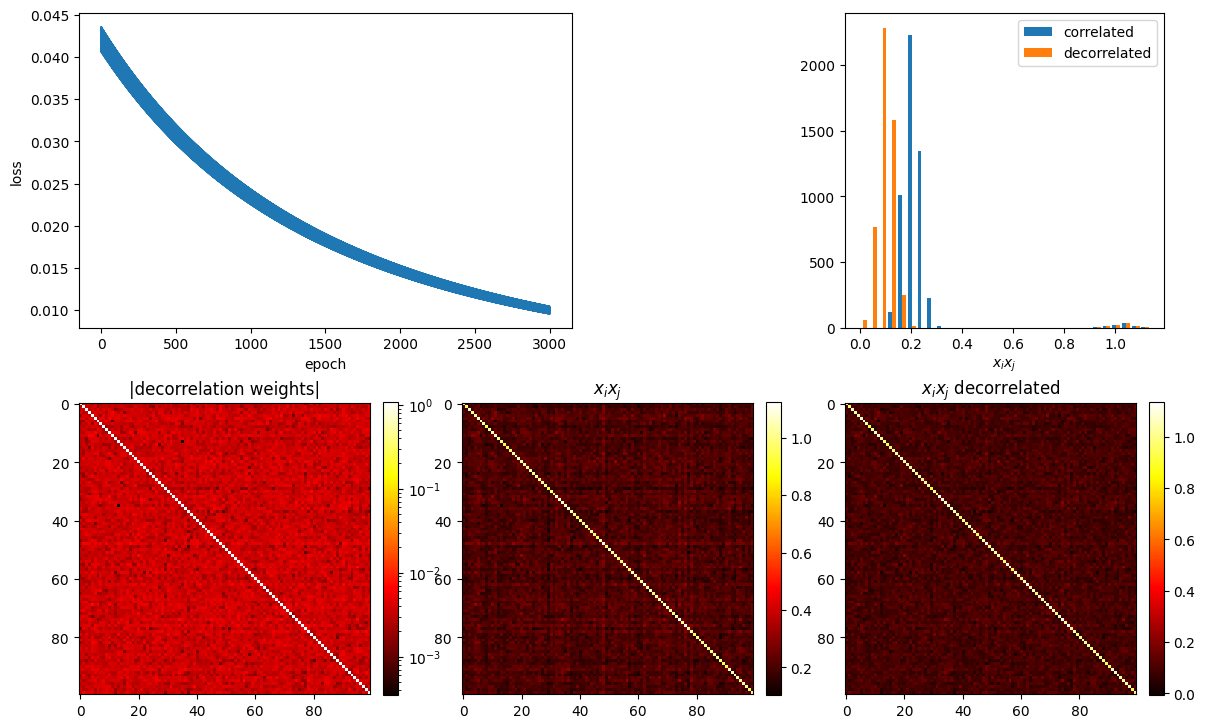

In [6]:
plot_results(model, L, A1, A2)

Decorrelation of correlated input using DecorConv2d

In [7]:
# generate [N, M] correlated input
num_examples=1000
in_channels=2
out_channels=3
height=10
width=10
kernel_size=(3,3)
num_samples=1000
num_epochs=1000
seed=42
eta=1e-3
downsample_perc=0.1

num_features=in_channels*height*width
size = in_channels * np.prod(kernel_size)

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

d = torch.distributions.MultivariateNormal(torch.zeros(num_features), 0.1 * torch.eye(num_features) + 0.9 * torch.ones((num_features, num_features)))
data = d.sample((num_examples,)).reshape(num_examples,in_channels,height,width)

# create a convolutional decorrelator
# NOTE: how many samples for effective input decorrelation? Dependence on dim?
# nr of samples instead of perc?
# NOTE: version for immediate non-batched decorrelation...
model = DecorConv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, variance=1.0, downsample_perc=downsample_perc)

L, A1, A2 = decorrelate(num_epochs, data, model, eta) 


iteration 0	loss: 0.904
iteration 1	loss: 0.449
iteration 2	loss: 1.228
iteration 3	loss: 0.535
iteration 4	loss: 0.686
iteration 5	loss: 1.163
iteration 6	loss: 0.323
iteration 7	loss: 2.389
iteration 8	loss: 0.355
iteration 9	loss: 1.161
iteration 10	loss: 0.540
iteration 11	loss: 0.959
iteration 12	loss: 0.521
iteration 13	loss: 1.026
iteration 14	loss: 0.688
iteration 15	loss: 0.721
iteration 16	loss: 1.121
iteration 17	loss: 0.391
iteration 18	loss: 1.769
iteration 19	loss: 0.269
iteration 20	loss: 2.964
iteration 21	loss: 0.147
iteration 22	loss: 5.336
iteration 23	loss: 0.216
iteration 24	loss: 1.734
iteration 25	loss: 0.438
iteration 26	loss: 0.712
iteration 27	loss: 1.216
iteration 28	loss: 0.508
iteration 29	loss: 0.706
iteration 30	loss: 1.268
iteration 31	loss: 0.460
iteration 32	loss: 1.446
iteration 33	loss: 0.295
iteration 34	loss: 2.899
iteration 35	loss: 0.129
iteration 36	loss: 9.792
iteration 37	loss: 0.076
iteration 38	loss: 20.503
iteration 39	loss: 0.060
iteration

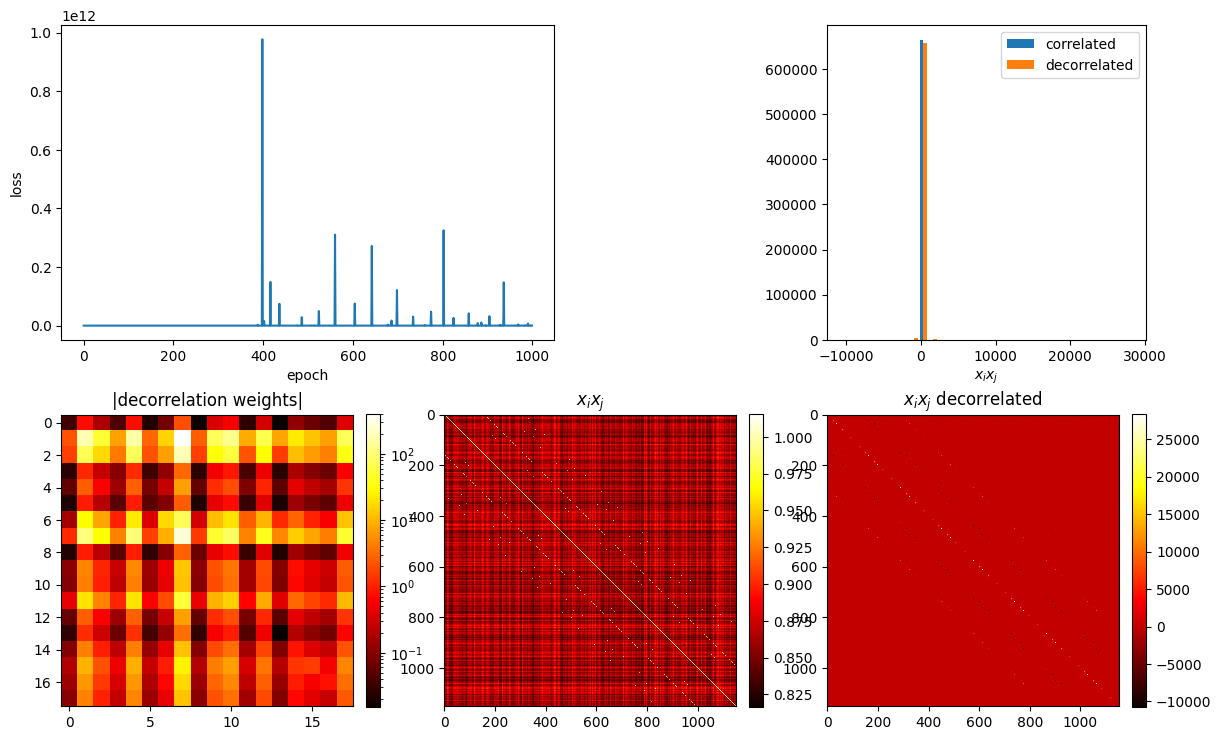

In [8]:
plot_results(model, L, A1, A2)

In [9]:
torch.diag(A2)

tensor([6.2426e-01, 2.6383e+04, 5.6576e+03,  ..., 9.0100e+01, 4.3607e+01,
        2.2500e+01])